In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import numpy as np
import seaborn as sns
import re
#!pip install scikit-learn==1.4.0
import sklearn
print(sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

1.3.0


In [2]:
data = pd.read_csv("2023-2034 NBA Season Advanced Player Stats - Sheet1.csv")
print(data.head())
print(data.shape)

   Rk            Player   Pos  Age   Tm   G    MP   PER    TS%   3PAr  ...  \
0   1  Precious Achiuwa  PF-C   24  TOT  65  1485  15.3  0.551  0.209  ...   
1   1  Precious Achiuwa     C   24  TOR  25   437  15.0  0.512  0.276  ...   
2   1  Precious Achiuwa    PF   24  NYK  40  1048  15.4  0.575  0.166  ...   
3   2       Bam Adebayo     C   26  MIA  61  2098  20.0  0.571  0.028  ...   
4   3      Ochai Agbaji    SG   23  TOT  72  1457   8.0  0.503  0.505  ...   

   OWS  DWS   WS  WS/48  Unnamed: 24  OBPM  DBPM  BPM  VORP  Player-additional  
0  1.3  2.1  3.4  0.111          NaN  -1.4   0.4 -1.0   0.4          achiupr01  
1  0.0  0.4  0.5  0.050          NaN  -1.5  -0.2 -1.6   0.0          achiupr01  
2  1.3  1.7  3.0  0.136          NaN  -1.4   0.7 -0.7   0.3          achiupr01  
3  2.4  3.7  6.1  0.138          NaN   0.8   1.6  2.4   2.3          adebaba01  
4 -0.4  0.6  0.2  0.008          NaN  -3.3  -0.9 -4.2  -0.8          agbajoc01  

[5 rows x 30 columns]
(717, 30)


In [3]:
#bios data for 2023-2024 season:

bios_data = pd.read_csv("2023-2024 NBA Player Bios - Sheet1.csv")
print(bios_data.head())
print(bios_data.shape)

          PLAYER TEAM  AGE HEIGHT  WEIGHT         COLLEGE COUNTRY DRAFT YEAR  \
0    A.J. Lawson  DAL   23    6-6     179  South Carolina  Canada  Undrafted   
1       AJ Green  MIL   24    6-4     190   Northern Iowa     USA  Undrafted   
2     AJ Griffin  ATL   20    6-6     220            Duke     USA       2022   
3   Aaron Gordon  DEN   28    6-8     235         Arizona     USA       2014   
4  Aaron Holiday  HOU   27    6-0     185            UCLA     USA       2018   

  DRAFT ROUND DRAFT NUMBER  GP   PTS  REB  AST  NETRTG  OREB%  DREB%  USG%  \
0   Undrafted    Undrafted  35   3.4  1.0  0.4     4.3    4.1    8.3  17.7   
1   Undrafted    Undrafted  49   4.5  1.1  0.6     2.5    1.7    9.5  15.8   
2           1           16  18   2.1  0.8  0.2    -9.8    1.4   10.1  15.6   
3           1            4  67  13.9  6.5  3.4     7.9    7.9   13.1  17.6   
4           1           23  70   6.5  1.6  1.8     2.9    1.6    7.7  15.6   

    TS%  AST%  
0  56.5   7.6  
1  62.6   7.7  
2 

In [4]:
#PER for only centers:
mask_center = data['Pos'] == 'C'
data_filtered = data[mask_center]
merged_bios_data_filtered = pd.merge(data_filtered, bios_data, 
                                     left_on = 'Player', right_on = 'PLAYER', how = 'left')

mask_weight_nna = merged_bios_data_filtered['WEIGHT'].notna()
no_na_merged = merged_bios_data_filtered[mask_weight_nna]


PER_per_Center = no_na_merged.groupby('Player')['PER'].mean()
WEIGHT_per_Center = no_na_merged.groupby('Player')['WEIGHT'].mean()
AGE_per_Center = no_na_merged.groupby('Player')['AGE'].mean()
Centers_df = pd.concat([PER_per_Center, WEIGHT_per_Center, AGE_per_Center], axis=1)

C:\Users\james\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


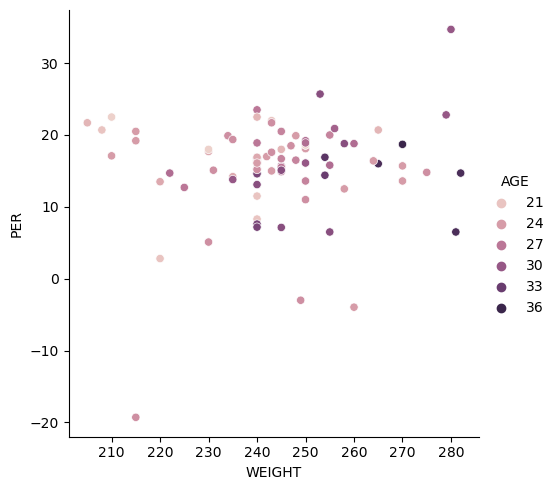

In [5]:
#Create SNS display for Centers in the current NBA comparing PER with weight:

sns.relplot(x = 'WEIGHT', y = 'PER', data = Centers_df, hue = 'AGE', kind = 'scatter')

In [6]:
#For creating a function and applying it to a pandas df:



#To get height aspect
#def change_feet_inches_to_feet(height):
    #element = height.split("-")
    #feet = float(element[0])
    #inches_feet = float(element[1])/12
    #return feet + inches_feet

#no_na_merged['convt_Height'] = no_na_merged['HEIGHT'].apply(change_feet_inches_to_feet)
#Height_per_Center = no_na_merged.groupby('Player')['convt_Height'].mean()

#merge the two serires into a df:
